# Work with Time
## Lecture demo


In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import statsmodels.api as sm
import statsmodels.graphics as smg
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from dateutil.parser import parse
from pandas import Series
sns.set(style='white', color_codes=True, font_scale=1.3)
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 6, 4

# make the Pandas tables a little more readable
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [2]:
# read in stocks file
# convert the string that corresponds to date into datetime
# the first column (date) to be the index
df_stock = pd.read_csv('stocks.csv',parse_dates=True,index_col=0)
msft = df_stock.MSFT  # a series of MSFT stock

# Wrapping up last lab...

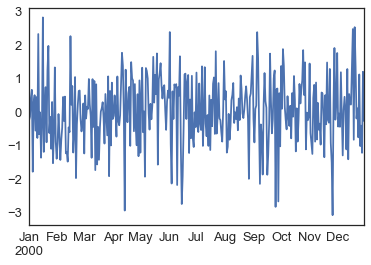

In [15]:
# make a larger time series
# give me 365 days staring at 1/1/2000
rng = pd.period_range('1/1/2000',periods=365,freq='D')  
ts = Series(np.random.randn(len(rng)),index=rng)
ts.plot()

In [17]:
# create a new time series with the mean as the monthly value
ts.resample('M').mean()

2000-01   -0.035178
2000-02   -0.276216
2000-03   -0.178873
2000-04    0.152701
2000-05    0.382764
2000-06   -0.057269
2000-07    0.051096
2000-08    0.106037
2000-09   -0.164234
2000-10    0.263980
2000-11   -0.128106
2000-12    0.211657
Freq: M, dtype: float64

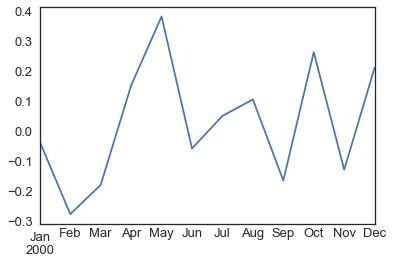

In [18]:
# plot it
ts.resample('M').mean().plot()

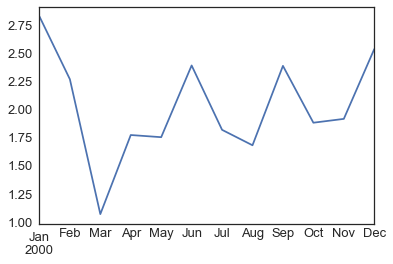

In [19]:
# find max value in that month
ts.resample('M').max().plot()

# working with data frames

In [20]:
df_stock.head(10)

,AAPL,MSFT,SPX
Date,,,
2011-01-03,43.838201,24.542705,1271.869995
2011-01-04,44.066990,24.639192,1270.199951
2011-01-05,44.427464,24.560248,1276.560059
2011-01-06,44.391547,25.279513,1273.849976
2011-01-07,44.709458,25.086540,1271.500000
2011-01-10,45.551451,24.753221,1269.750000
2011-01-11,45.443707,24.656736,1274.479980
2011-01-12,45.813494,25.042681,1285.959961
2011-01-13,45.981095,24.726908,1283.760010


In [21]:
# B is telling pandas that we are working with business days
df_stock = df_stock.to_period("B")

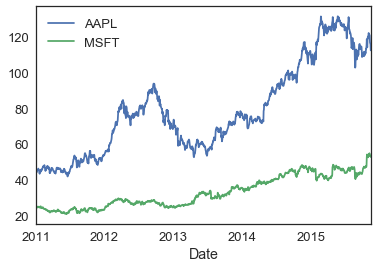

In [22]:
df_stock[['AAPL','MSFT']]   # select apple and microsft
# plot the time series
df_stock[['AAPL','MSFT']].plot() 

In [23]:
# resample, replacing days by months, and use mean (average monthly value)
df_resam = df_stock.resample("M").mean()

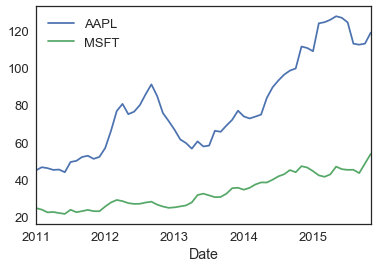

In [24]:
# plot
df_resam[['AAPL','MSFT']].plot()

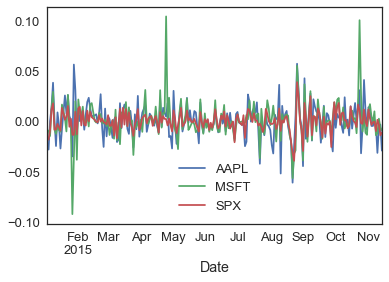

In [28]:
# We can visualize the stock returns this year. (velocity)
fig, ax = plt.subplots()
df_stock['2015'].pct_change().plot(ax=ax)

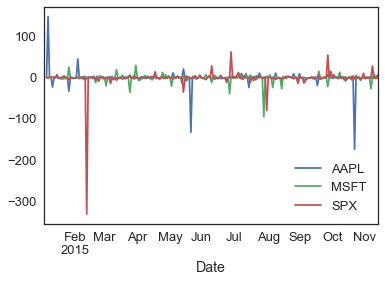

In [29]:
# Visualize the percentage change of percent change (acceleration)
fig, ax = plt.subplots()
df_stock['2015'].pct_change().pct_change().plot(ax=ax)

In [30]:
# Resampling two ways - resample() is an aggregtation
# asfreq() is selection
print('On 12/30/2011, msft was at:', msft['2011-12-30'])

On 12/30/2011, msft was at: 23.375811


In [31]:
# business year end frequency (select)
msft.asfreq('BA')  # business anum

Date
2011-12-30    23.375811
2012-12-31    24.731343
2013-12-31    35.686825
2014-12-31    45.523762
Freq: BA-DEC, Name: MSFT, dtype: float64

In [32]:
# business year end frequency (sample)
msft.resample('BA').mean()

Date
2011-12-30    23.140762
2012-12-31    27.212358
2013-12-31    30.573263
2014-12-31    41.104630
2015-12-31    45.145916
Freq: BA-DEC, Name: MSFT, dtype: float64

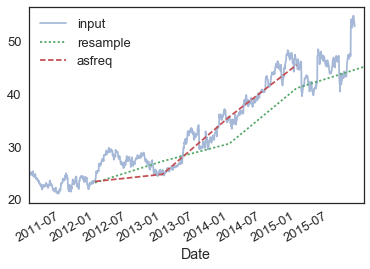

In [33]:
msft.plot(alpha=0.5, style='-')
msft.resample('BA').mean().plot(style=':')  
msft.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

In [34]:
# give me the first 10 days of apple
df_10day = df_stock.AAPL[:10]  
df_10day

Date
2011-01-03    43.838201
2011-01-04    44.066990
2011-01-05    44.427464
2011-01-06    44.391547
2011-01-07    44.709458
2011-01-10    45.551451
2011-01-11    45.443707
2011-01-12    45.813494
2011-01-13    45.981095
2011-01-14    46.353539
Freq: B, Name: AAPL, dtype: float64

In [35]:
# give you the amount changed over time
df_10day.pct_change()

# does the right thing for weekends

Date
2011-01-03         NaN
2011-01-04    0.005219
2011-01-05    0.008180
2011-01-06   -0.000808
2011-01-07    0.007162
2011-01-10    0.018833
2011-01-11   -0.002365
2011-01-12    0.008137
2011-01-13    0.003658
2011-01-14    0.008100
Freq: B, Name: AAPL, dtype: float64

In [36]:
# notice: skips the non-business days
# does the right thing for weekends
df_10day.shift(1)

Date
2011-01-03          NaN
2011-01-04    43.838201
2011-01-05    44.066990
2011-01-06    44.427464
2011-01-07    44.391547
2011-01-10    44.709458
2011-01-11    45.551451
2011-01-12    45.443707
2011-01-13    45.813494
2011-01-14    45.981095
Freq: B, Name: AAPL, dtype: float64

In [37]:
# give me a resample (not restricted to business days)
# can do this for frames too
df_stock.resample('D').sum().head(15)

,AAPL,MSFT,SPX
Date,,,
2011-01-03,43.838201,24.542705,1271.869995
2011-01-04,44.066990,24.639192,1270.199951
2011-01-05,44.427464,24.560248,1276.560059
2011-01-06,44.391547,25.279513,1273.849976
2011-01-07,44.709458,25.086540,1271.500000
2011-01-08,NaN,NaN,NaN
2011-01-09,NaN,NaN,NaN
2011-01-10,45.551451,24.753221,1269.750000
2011-01-11,45.443707,24.656736,1274.479980


In [38]:
# ffill in the missing data
df_stock.resample('D').sum().fillna(method='ffill').head(10)

,AAPL,MSFT,SPX
Date,,,
2011-01-03,43.838201,24.542705,1271.869995
2011-01-04,44.066990,24.639192,1270.199951
2011-01-05,44.427464,24.560248,1276.560059
2011-01-06,44.391547,25.279513,1273.849976
2011-01-07,44.709458,25.086540,1271.500000
2011-01-08,44.709458,25.086540,1271.500000
2011-01-09,44.709458,25.086540,1271.500000
2011-01-10,45.551451,24.753221,1269.750000
2011-01-11,45.443707,24.656736,1274.479980


### Playing with moving averages

* Rolling - only take into account a window
* Expanding - take into account everything before
* Exponential Weighting - weight today more than yesterday
  and yesterday more than day before

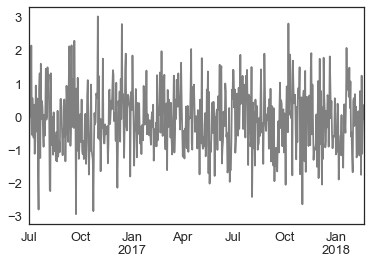

In [39]:
# make play dataset
rtest = pd.DataFrame(np.random.randn(600, 1), 
                  index = pd.date_range('7/1/2016', 
                                        freq = 'D', periods = 600), 
                  columns = ['A'])
rtest['A'].plot(color='gray')

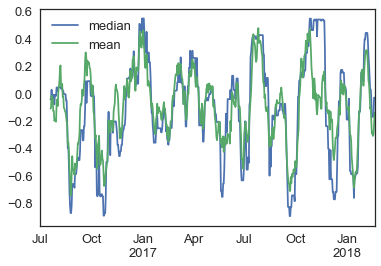

In [54]:
# r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, 
# r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
# consider 20 "units" back (days in this case)
r = rtest.rolling(window=20)
rtest.A.plot(color='gray')
r.mean()['A'].plot(color='red')
#r['A'].agg(['median','mean']).plot()

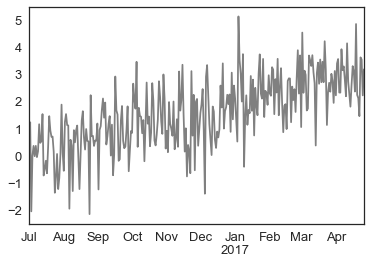

In [55]:
# time series with a trend
rtest = pd.DataFrame(np.random.randn(300)+np.arange(300)*.01, 
                  index = pd.date_range('7/1/2016', 
                                        freq = 'D', periods = 300), 
                  columns = ['A'])
rtest['A'].plot(color='gray')

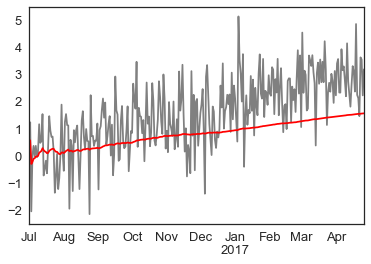

In [56]:
# an expanding moving average
re = rtest.expanding(1)
rtest['A'].plot(color='gray')
re.mean()['A'].plot(color='red')

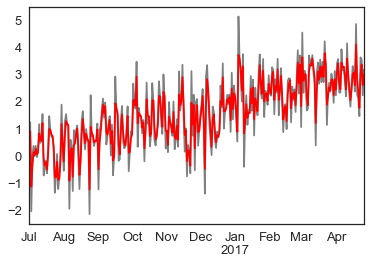

In [57]:
# exponential, com=.5 is how much decay
# see http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.ewm.html
re = rtest.ewm(com=.5)
rtest['A'].plot(color='gray')
re.mean()['A'].plot(color='red')

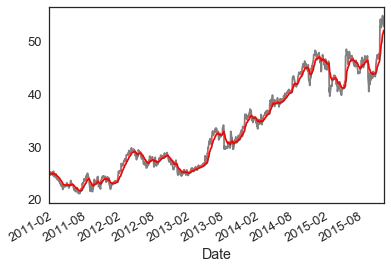

In [72]:
# do this for microsoft
# WORKSHEET ACTIVITY
# calculate the windows (rolling, expanding, exp)
# describe what happens when you increase the value of com
re = msft.ewm(com=10)
msft.plot(color='gray')
re.mean().plot(color='red')


# Seasons + Auto-Correlation

In [74]:
# correlation
# generate 365 fake numbers
d1 = np.random.random(365)
# copy
d2 = d1.copy()                

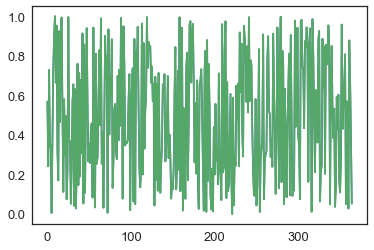

In [75]:
plt.plot(d1)
plt.plot(d2)

In [76]:
# calculate the correlations
np.corrcoef(d1,d2)

array([[ 1.,  1.],
       [ 1.,  1.]])

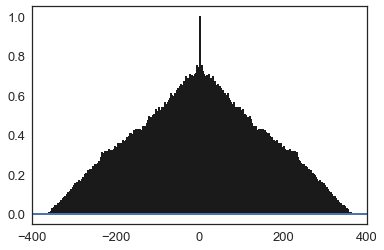

In [77]:
# calculate xcorr (shifts one timeseries relative to the other)
_ = plt.xcorr(d1,d2,usevlines=True,maxlags=None,normed=True,lw=2)
# calculate cross correlation between d1 and d2
# maxlags --> how many lags should I try?  None --> all, 20 --> -20 to 20
# normed --> normalize
# lw = line width

In [78]:
# correlation
d1 = np.random.random(365)    # generate 365 fake numbers
d2 = d1.copy()                # copy
for i in range(30):           # insert .2, 30 times at start of d3
    d2 = np.insert(d2,0,0.2)
d2 = d2[0:365]                # cut d2 so that it's back to 365 number

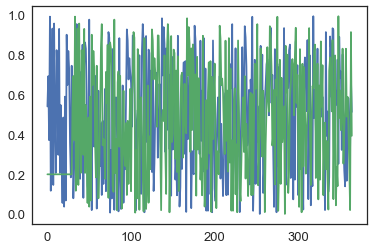

In [79]:
plt.plot(d1)
plt.plot(d2)

In [80]:
# calculate the correlation
np.corrcoef(d1,d2)

array([[ 1.        , -0.03122977],
       [-0.03122977,  1.        ]])

In [83]:
# bad correlation due to shift
# if we shift back we have a correlation of 1
np.corrcoef(d1[0:335],d2[30:365])

array([[ 1.,  1.],
       [ 1.,  1.]])

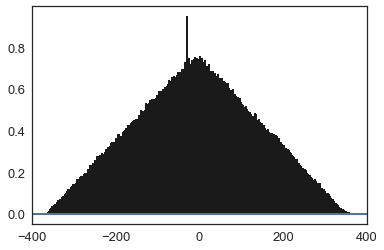

In [84]:
# what does this look like with xcorr?
_ = plt.xcorr(d1,d2,usevlines=True,maxlags=None,normed=True,lw=2)
# calculate cross correlation between d1 and d2
# maxlags --> how many lags should I try?  None --> all, 20 --> -20 to 20
# normed --> normalize
# lw = line width

# Let's Get Fancy

In [4]:
df_trend = pd.read_csv('googletrends.csv',parse_dates=True, index_col=0)
df_trend = df_trend.to_period('W-SAT')  # convert so that times are based on periods of weeks ending on saturday

In [5]:
df_trend.head(5)

,turkey,iphone,santa,FIFA,beer
Week,,,,,
2004-01-04/2004-01-10,11,0,34,6,72
2004-01-11/2004-01-17,11,0,35,5,70
2004-01-18/2004-01-24,9,0,34,5,72
2004-01-25/2004-01-31,11,0,33,5,76
2004-02-01/2004-02-07,10,0,33,4,74


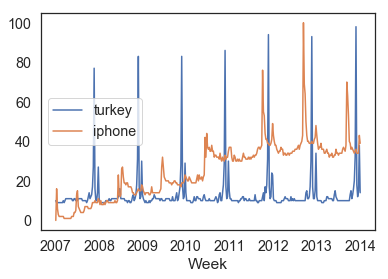

In [6]:
# grab all data from 2007 to 2013
# grab the turkey and iphone time series
# plot them
df_trend.ix['2007':'2013',['turkey','iphone']].plot()

In [7]:
ts_santa = df_trend.ix['2007':'2013','santa'].to_timestamp()
ts_fifa = df_trend.ix['2007':'2013','FIFA'].to_timestamp()
ts_beer = df_trend.ix['2007':'2013','beer'].to_timestamp()
ts_iphone = df_trend.ix['2007':'2013','iphone'].to_timestamp()
ts_turkey = df_trend.ix['2007':'2013','turkey'].to_timestamp()

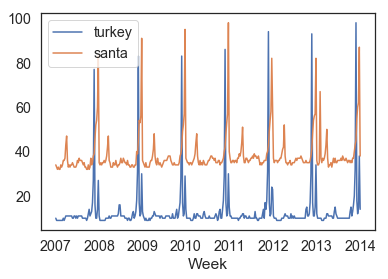

In [8]:
df_trend.ix['2007':'2013',['turkey','santa']].plot()
# grabbing all data from 2007 to 2013
# grabbing the turkey and iphone time series
# plotting them

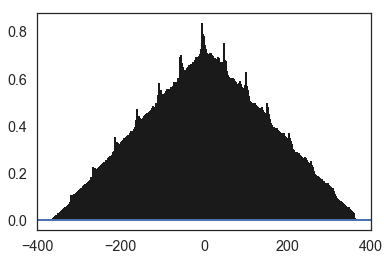

In [9]:
#np.array(ts_santa.values)
_ = plt.xcorr(ts_turkey.values.astype(float),ts_santa.values.astype(float),
              usevlines=True,maxlags=None,normed=True,lw=2)

Text(0.5,1,'Cross Correlation: "santa" vs. "turkey"')

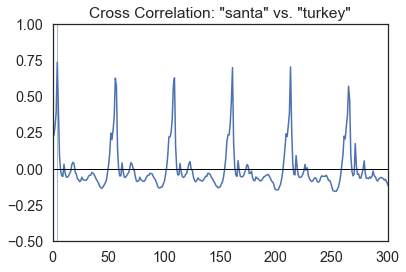

In [10]:
# Cross correlation between "santa" and "turkey"
ccf = sm.tsa.stattools.ccf(ts_santa['2007':'2013'], ts_turkey['2007':'2013'])

plt.plot(ccf)
plt.xlim(0,300)
plt.ylim(-0.5, 1)
plt.axvline(4, linewidth=0.5)
plt.axhline(0, color="black", linewidth=1)
plt.title('Cross Correlation: "santa" vs. "turkey"')

In [11]:
## WORKSHEET QUESTION: what is this telling us?

Text(0.5,1,'Cross Correlation: "turkey" vs. white noise')

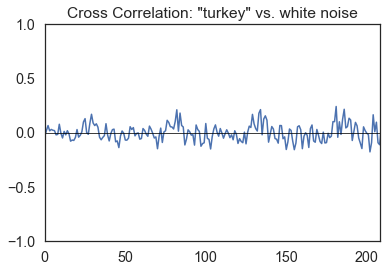

In [12]:
# Cross correlation between "turkey" and white noise
white_noise = np.random.randn(len(ts_turkey))
ccf = sm.tsa.stattools.ccf(ts_turkey, white_noise)

plt.plot(ccf)
plt.xlim(0,208)
plt.ylim(-1,1)
plt.axhline(0, color="black", linewidth=0.75)
plt.title('Cross Correlation: "turkey" vs. white noise')

Text(0.5,1,'Cross Correlation: "fifa" vs. "beer"')

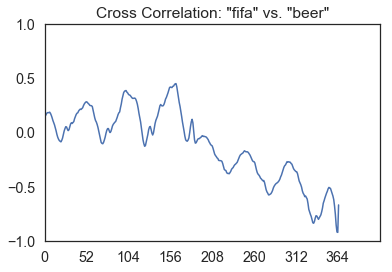

In [13]:
## WORKSHEET QUESTION: find the cross correlation between beer and FIFA

# what can we infer from this? what can't we?
ccf = sm.tsa.stattools.ccf(ts_beer, ts_fifa)

plt.plot(ccf)
plt.xlim(0,52*8)
plt.ylim(-1,1)
plt.xticks(range(0,52*8,52))
plt.title('Cross Correlation: "fifa" vs. "beer"')

### Autocorrelation

A measure of the correlation between the the timeseries with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).

Text(0.5,1,"Autocorrelation for 'turkey'")

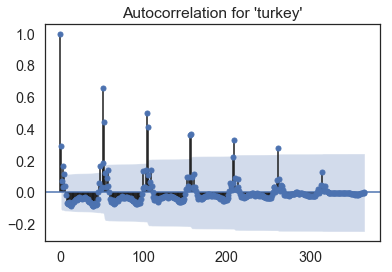

In [14]:
# Plot autocorrelation function (ACF) of the data of "turkey".
fig, ax = plt.subplots()
smg.tsaplots.plot_acf(ts_turkey,ax=ax)
plt.title("Autocorrelation for 'turkey'")

In [15]:
# Zoom in


Text(0.5,1,'Autocorrelation for white-noise')

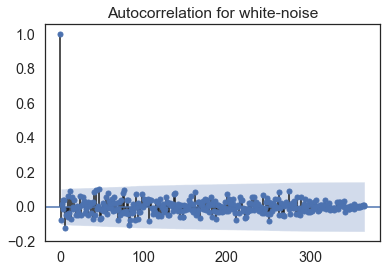

In [16]:
# Plot ACF of an array of white noise
fig, ax = plt.subplots()
smg.tsaplots.plot_acf(white_noise,ax=ax)
plt.title("Autocorrelation for white-noise")

### Partial Autocorrelation

Measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

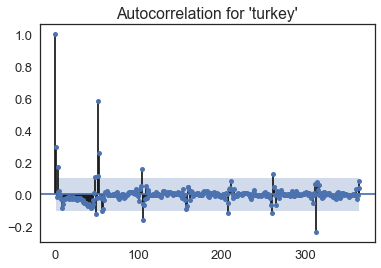

In [102]:
# Partial autocorrelation function of "turkey"
fig, ax = plt.subplots()
smg.tsaplots.plot_pacf(ts_turkey,ax=ax)
plt.title("Autocorrelation for 'turkey'")

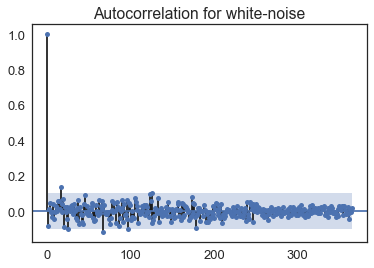

In [103]:
# Plot ACF of an array of white noise
fig, ax = plt.subplots()
smg.tsaplots.plot_pacf(white_noise,ax=ax)
plt.title("Autocorrelation for white-noise")

In [ ]:
# Plot ACF of "iphone".
ts_iphone.plot()

In [ ]:
# Plot ACF of "iphone".


In [ ]:
# Plot PACF of "iphone".


## Seasonality

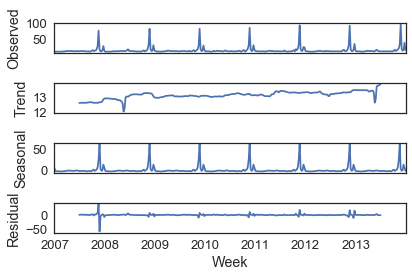

In [107]:
# ^ grabbed the time series for turkey from 2007 to 2013
decompose_result = sm.tsa.seasonal_decompose(ts_turkey)
# ^ decompose into seasonal and trend and residual data
_ = decompose_result.plot()

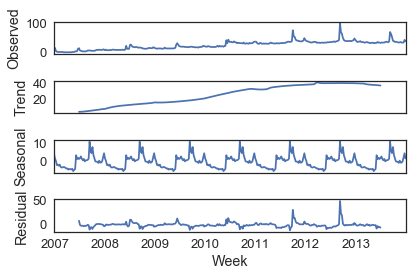

In [108]:
# ^ grabbed the time series for turkey from 2007 to 2013
decompose_result = sm.tsa.seasonal_decompose(ts_iphone)
# ^ decompose into seasonal and trend and residual data
_ = decompose_result.plot()